## Stage 4
### Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US
* Start your data from the first day of infections in US. X-Axis - number of days since the first case, Y-Axis - number of new cases and deaths.
* Calculate and report Root Mean Square Error (RMSE) for your models (linear and non-linear). Discuss bias versus variance tradeoff.
* Plot trend line along for the data along with the forecast of 1 week ahead.

### The following team task is present in the separate other notebook
* Describe the trends as compared to other countries.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as sf
import plotly.express as px

import statsmodels.api as smf
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import Image
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

C:\Users\Manish\anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Manish\anaconda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


#### Loading the super dataset generated in stage1 for this task

In [4]:
#Read the dataset 
covid_supermerged_data = pd.read_csv('../../../data/stage_1/superdataset.csv')
#covid_supermerged_data = pd.read_csv('superdataset.csv')
covid_supermerged_data

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
0,0,statewide unallocated,AL,2020-01-22,0,0,0
1,0,statewide unallocated,AL,2020-01-23,0,0,0
2,0,statewide unallocated,AL,2020-01-24,0,0,0
3,0,statewide unallocated,AL,2020-01-25,0,0,0
4,0,statewide unallocated,AL,2020-01-26,0,0,0
...,...,...,...,...,...,...,...
2346471,56045,weston county,WY,2022-02-03,1491,17,6927
2346472,56045,weston county,WY,2022-02-04,1496,17,6927
2346473,56045,weston county,WY,2022-02-05,1496,17,6927
2346474,56045,weston county,WY,2022-02-06,1496,17,6927


#### Adding two new columns of daily cases and daily deaths using diff() function

In [5]:
#Find the difference of the two columns Confirmed and Deaths
covid_supermerged_data['Num of Cases per day'] = covid_supermerged_data['Confirmed'].diff()
covid_supermerged_data['Num of Deaths per day'] = covid_supermerged_data['Deaths'].diff()
covid_supermerged_data

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
0,0,statewide unallocated,AL,2020-01-22,0,0,0,NaN,NaN
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2346471,56045,weston county,WY,2022-02-03,1491,17,6927,6.0,0.0
2346472,56045,weston county,WY,2022-02-04,1496,17,6927,5.0,0.0
2346473,56045,weston county,WY,2022-02-05,1496,17,6927,0.0,0.0
2346474,56045,weston county,WY,2022-02-06,1496,17,6927,0.0,0.0


In [6]:
#Remove the unallocated county from the dataset
covid_supermerged_data = covid_supermerged_data[covid_supermerged_data['County_Name']!='statewide unallocated']

#### Converting the date to datetime datatype from object dtype

In [7]:
covid_supermerged_data['Date'] = covid_supermerged_data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

#### Grouping the data by Date so we will have 747 rows; one for each day.

In [8]:
#group the data by date 
covid_supermerged_data = covid_supermerged_data.groupby("Date").sum().reset_index()
covid_supermerged_data.head()

,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
0,2020-01-22,93245330,712,1,321279906,-72214186.0,-870408.0
1,2020-01-23,93245330,723,1,321279906,11.0,0.0
2,2020-01-24,93245330,730,1,321279906,7.0,0.0
3,2020-01-25,93245330,740,1,321279906,10.0,0.0
4,2020-01-26,93245330,748,1,321279906,8.0,0.0


In [9]:
#Removing the first row of the dataset
covid_supermerged_data = covid_supermerged_data.drop([0])

In [10]:
covid_supermerged_data

,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
1,2020-01-23,93245330,723,1,321279906,11.0,0.0
2,2020-01-24,93245330,730,1,321279906,7.0,0.0
3,2020-01-25,93245330,740,1,321279906,10.0,0.0
4,2020-01-26,93245330,748,1,321279906,8.0,0.0
5,2020-01-27,93245330,758,1,321279906,10.0,0.0
...,...,...,...,...,...,...,...
743,2022-02-03,93245330,72283911,841597,321279906,274783.0,2073.0
744,2022-02-04,93245330,72684661,845515,321279906,400750.0,3918.0
745,2022-02-05,93245330,72733724,845746,321279906,49063.0,231.0
746,2022-02-06,93245330,72777948,846024,321279906,44224.0,278.0


#### Generate first occurence of days  in the dataframe.

* https://stackoverflow.com/questions/38862293/how-to-add-incremental-numbers-to-a-new-column-using-pandas

#### Adding one extra column of Days which corresponds to the first occurence of cases

In [11]:
df = covid_supermerged_data.assign( Days =[1 + i for i in range(len(covid_supermerged_data))])[['Days'] + covid_supermerged_data.columns.tolist()]
df

,Days,Date,countyFIPS,Confirmed,Deaths,population,Num of Cases per day,Num of Deaths per day
1,1,2020-01-23,93245330,723,1,321279906,11.0,0.0
2,2,2020-01-24,93245330,730,1,321279906,7.0,0.0
3,3,2020-01-25,93245330,740,1,321279906,10.0,0.0
4,4,2020-01-26,93245330,748,1,321279906,8.0,0.0
5,5,2020-01-27,93245330,758,1,321279906,10.0,0.0
...,...,...,...,...,...,...,...,...
743,743,2022-02-03,93245330,72283911,841597,321279906,274783.0,2073.0
744,744,2022-02-04,93245330,72684661,845515,321279906,400750.0,3918.0
745,745,2022-02-05,93245330,72733724,845746,321279906,49063.0,231.0
746,746,2022-02-06,93245330,72777948,846024,321279906,44224.0,278.0


#### Selecting the required columns from the dataframe

In [12]:
df = df.drop(columns=["countyFIPS" , "population" ,"Confirmed" , "Deaths"])
df

,Days,Date,Num of Cases per day,Num of Deaths per day
1,1,2020-01-23,11.0,0.0
2,2,2020-01-24,7.0,0.0
3,3,2020-01-25,10.0,0.0
4,4,2020-01-26,8.0,0.0
5,5,2020-01-27,10.0,0.0
...,...,...,...,...
743,743,2022-02-03,274783.0,2073.0
744,744,2022-02-04,400750.0,3918.0
745,745,2022-02-05,49063.0,231.0
746,746,2022-02-06,44224.0,278.0


####  Adding the days column towards the end of the dataframe

* https://stackoverflow.com/questions/58228837/best-way-to-move-a-column-in-pandas-dataframe-to-last-column-in-large-dataframe

Popping the Day column from the front and adding it to the end of the dataframe

In [13]:
s = df.pop('Days')
new_df = pd.concat([df, s], 1)
new_df

,Date,Num of Cases per day,Num of Deaths per day,Days
1,2020-01-23,11.0,0.0,1
2,2020-01-24,7.0,0.0,2
3,2020-01-25,10.0,0.0,3
4,2020-01-26,8.0,0.0,4
5,2020-01-27,10.0,0.0,5
...,...,...,...,...
743,2022-02-03,274783.0,2073.0,743
744,2022-02-04,400750.0,3918.0,744
745,2022-02-05,49063.0,231.0,745
746,2022-02-06,44224.0,278.0,746


#### Implement Linear Regression Model

* https://towardsdatascience.com/an-introduction-to-linear-regression-for-data-science-9056bbcdf675
* https://stackoverflow.com/questions/29934083/linear-regression-on-pandas-dataframe-using-sklearn-indexerror-tuple-index-ou

### Linear Regression Model for New cases

In [14]:
X1 = new_df[['Days']]
y1 = new_df['Num of Cases per day']

In [15]:
z1 = X1.to_numpy()

Splitting the data into Test & Train

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1)

In [17]:
x_train = x_train.to_numpy()

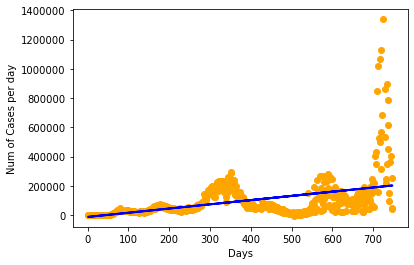

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
plt.scatter(x_train, y_train, color='orange')
plt.plot(x_train, model.predict(x_train),color='blue', linewidth=2)
plt.xlabel('Days')
plt.ticklabel_format(style='plain')
plt.ylabel('Num of Cases per day')
plt.show()

In [19]:
modelPred = model.predict(x_test)

#### I refered this code to calculate RMSE value
* https://stackoverflow.com/questions/45173451/scikit-learn-how-to-calculate-root-mean-square-error-rmse-in-percentage

#### Creating a function for RMSE calculation

In [20]:
#Calculating RMSE
def cal_rmse(a,b):
    meanSquaredError=mean_squared_error(a, b)
    print("MSE:", meanSquaredError)
    rootMeanSquaredError = np.sqrt(meanSquaredError)
    print("RMSE:", rootMeanSquaredError)

#### Using the created function to calculate RMSE.

In [21]:
cal_rmse(y_test, modelPred)

MSE: 19656120993.50401
RMSE: 140200.28884957408


### Linear Regression Model for New deaths

In [22]:
X2 = new_df[['Days']]
y2 = new_df['Num of Deaths per day']

#### Splitting data into test/train

In [23]:
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X2, y2)

In [24]:
x_train_t = x_train_t.to_numpy()

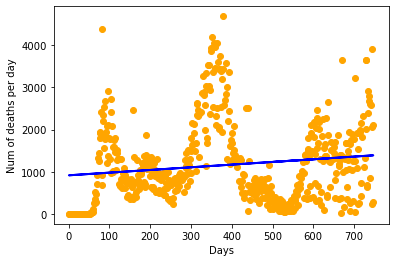

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_t, y_train_t)
plt.scatter(x_train_t, y_train_t,  color='orange')
plt.plot(x_train_t, model.predict(x_train_t), color='blue', linewidth=2)
plt.xlabel('Days')
plt.ticklabel_format(style='plain')
plt.ylabel('Num of deaths per day')
plt.show()

In [26]:
modelPred_t = model.predict(x_test_t)

In [27]:
#calculating RMSE values from the above defined function
cal_rmse(y_test_t, modelPred_t)

MSE: 913040.6989835846
RMSE: 955.5316315976069


## Non-Linear (polynomial) regression for cases

In [28]:
#x_train, x_test, y_train, y_test = train_test_split(X1, y1)

I have referred the method for sklearn using this:
* https://youtu.be/SSmpyoIdJTc

#### Creating polynomial features for degree 2, 3 and 4

In [29]:
poly2 = PolynomialFeatures(degree = 2)
poly3 = PolynomialFeatures(degree = 3)
poly4 = PolynomialFeatures(degree = 4)

In [30]:
X_train_poly2 = poly2.fit_transform(x_train)

X_train_poly3 = poly3.fit_transform(x_train)

X_train_poly4 = poly4.fit_transform(x_train)

In [31]:
y1 = pd.DataFrame(y_train)

In [32]:
X_test_poly = poly2.fit_transform(x_test)

#### Fitting the model

In [33]:
from sklearn import linear_model
model2 = linear_model.LinearRegression()
model3 = linear_model.LinearRegression()
model4 = linear_model.LinearRegression()
#model = linear_model.LinearRegression()

#degree 2
model2 = model2.fit(X_train_poly2,y1)

#degree 3
model3 = model3.fit(X_train_poly3,y1)

#degree 4
model4 = model4.fit(X_train_poly4,y1)

#### Calculating co-efficient and intercept values for each model degree

In [34]:
coefficient2 = model2.coef_
coefficient3 = model3.coef_
coefficient4 = model4.coef_
intercept2 = model2.intercept_
intercept3 = model3.intercept_
intercept4 = model4.intercept_

#### Flatenning to one dimenstional

In [36]:
coefficient2 = coefficient2.flatten()
coefficient3 = coefficient3.flatten()
coefficient4 = coefficient4.flatten()

#### Generating response for each variable using the equations using intercept and co-effiecient for each degree models

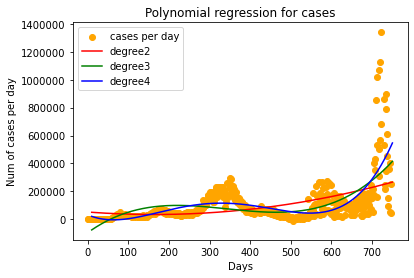

In [37]:
x_axis = np.arange(10,750,0.1)

response2  = intercept2 + coefficient2[1]*x_axis + coefficient2[2]*x_axis**2 
response3  = intercept3 + coefficient3[1]*x_axis + coefficient3[2]*x_axis**2 + coefficient3[3]*x_axis**3
response4  = intercept4 + coefficient4[1]*x_axis + coefficient4[2]*x_axis**2 + coefficient4[3]*x_axis**3 + coefficient4[4]*x_axis**4


plt.scatter(x_train,y1,color = 'orange')
plt.plot(x_axis,response2, color = 'r') 
plt.plot(x_axis,response3, color = 'g') 
plt.plot(x_axis,response4, color = 'b') 
plt.xlabel('Days')
plt.title("Polynomial regression for cases")
plt.legend(["cases per day", "degree2","degree3","degree4"], loc ="upper left")
plt.ticklabel_format(style='plain')
plt.ylabel('Num of cases per day')
plt.show()

In [38]:
modelPred_nlc = model.predict(x_test)

In [39]:
# Calculating RMSE using the function defined above
cal_rmse(y_test, modelPred_nlc)

MSE: 35026977543.72668
RMSE: 187154.95596891543


## Non-Linear (polynomial) regression for deaths

In [40]:
#x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X2, y2)

In [41]:
X_train_poly2_d = poly2.fit_transform(x_train_t)

X_train_poly3_d = poly3.fit_transform(x_train_t)

X_train_poly4_d = poly4.fit_transform(x_train_t)

In [42]:
y2 = pd.DataFrame(y_train_t)

#### Fitting the model

In [43]:
from sklearn import linear_model
model2_d = linear_model.LinearRegression()
model3_d = linear_model.LinearRegression()
model4_d = linear_model.LinearRegression()
#model = linear_model.LinearRegression()

#degree 2
model2_d = model2_d.fit(X_train_poly2_d,y2)

#degree 3
model3_d = model3_d.fit(X_train_poly3_d,y2)

#degree 4
model4_d = model4_d.fit(X_train_poly4_d,y2)

#### Calculating co-efficient and intercept for each model

In [44]:
coefficient2_d = model2_d.coef_
coefficient3_d = model3_d.coef_
coefficient4_d = model4_d.coef_
intercept2_d = model2_d.intercept_
intercept3_d = model3_d.intercept_
intercept4_d = model4_d.intercept_

#### Flatenning to one dimension

In [46]:
coefficient2_d = coefficient2_d.flatten()
coefficient3_d = coefficient3_d.flatten()
coefficient4_d = coefficient4_d.flatten()

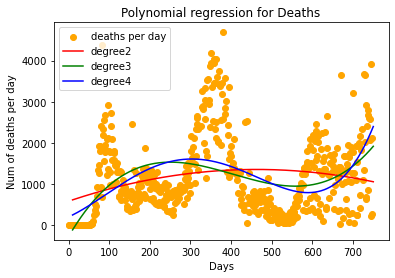

In [47]:
x_axis = np.arange(10,750,0.1)

response2_d  = intercept2_d + coefficient2_d[1]*x_axis + coefficient2_d[2]*x_axis**2 
response3_d  = intercept3_d + coefficient3_d[1]*x_axis + coefficient3_d[2]*x_axis**2 + coefficient3_d[3]*x_axis**3
response4_d  = intercept4_d + coefficient4_d[1]*x_axis + coefficient4_d[2]*x_axis**2 + coefficient4_d[3]*x_axis**3 + coefficient4_d[4]*x_axis**4

plt.scatter(x_train_t,y2,color = 'orange')
plt.plot(x_axis,response2_d, color = 'r') 
plt.plot(x_axis,response3_d, color = 'g') 
plt.plot(x_axis,response4_d, color = 'b') 
plt.xlabel('Days')
plt.title("Polynomial regression for Deaths")
plt.legend(["deaths per day", "degree2","degree3","degree4"], loc ="upper left")
plt.ticklabel_format(style='plain')
plt.ylabel('Num of deaths per day')
plt.show()

In [48]:
modelPred_nld = model.predict(x_test_t)

#### Calculating RMSE using the function defined above

In [49]:
cal_rmse(y_test_t, modelPred_nld)

MSE: 913040.6989835846
RMSE: 955.5316315976069


### Plot trend line along for the data along with the forecast of 1 week ahead.

We have referred the below site for generating new dates
* https://www.tutorialkart.com/python/python-range/python-range-to-list/#:~:text=To%20convert%20a%20Python%20Range%20to%20Python%20List%2C%20use%20list,item%20of%20range%20to%20list.

#### Adding next seven days data and predcting using model.predict()

In [50]:
# Adding new 7 days dates and data
new_dates = range(748, 756, 1)
new_dates = list(new_dates)
new_dates = np.arange(748,755).reshape(-1,1)

m1 = LinearRegression()
m1.fit(x_train,y1)

m2 = LinearRegression()
m2.fit(x_train_t,y_train_t)


#new cases forecast for 7 days
new_cases = m1.predict(new_dates)
new_deaths = m2.predict(new_dates)

p = pd.DataFrame(new_cases)
r = pd.DataFrame(new_deaths)
df_added = new_df
frames = [df_added['Num of Cases per day'], p]
result = pd.concat(frames)
# deaths
frames2 = [df_added['Num of Deaths per day'], r]
result2 = pd.concat(frames2)


#### Creating a new dataframe for the predicted data

In [51]:
p = pd.DataFrame(new_cases)
r = pd.DataFrame(new_deaths)

In [52]:
df_added = new_df
df_added

,Date,Num of Cases per day,Num of Deaths per day,Days
1,2020-01-23,11.0,0.0,1
2,2020-01-24,7.0,0.0,2
3,2020-01-25,10.0,0.0,3
4,2020-01-26,8.0,0.0,4
5,2020-01-27,10.0,0.0,5
...,...,...,...,...
743,2022-02-03,274783.0,2073.0,743
744,2022-02-04,400750.0,3918.0,744
745,2022-02-05,49063.0,231.0,745
746,2022-02-06,44224.0,278.0,746


#### Concate generated data with original data

In [53]:
frames = [df_added['Num of Cases per day'], p]
result = pd.concat(frames)
# deaths
frames2 = [df_added['Num of Deaths per day'], r]
result2 = pd.concat(frames2)

#### Renaming the dataframe columns

In [54]:
result.rename(columns = {0: 'Num of Cases per day'}, inplace = True)
result2.rename(columns = {0: 'Num of Deaths per day'}, inplace = True)

We have referred the dataframe concatenation from here.
* https://www.geeksforgeeks.org/how-to-combine-two-dataframe-in-python-pandas/

In [55]:
q = pd.DataFrame(new_dates)
frames1 = [df_added['Days'], q]
result1 = pd.concat(frames1)
result1.rename(columns = {0: 'Days'}, inplace = True)

In [56]:
df1 = pd.concat([result, result1,result2], axis=1)

In [57]:
df1

,Num of Cases per day,Days,Num of Deaths per day
1,11.000000,1,0.000000
2,7.000000,2,0.000000
3,10.000000,3,0.000000
4,8.000000,4,0.000000
5,10.000000,5,0.000000
...,...,...,...
2,203065.158575,750,1391.915035
3,203353.389131,751,1392.550191
4,203641.619688,752,1393.185347
5,203929.850244,753,1393.820503


We have referred plotly plots from the below link to create trendline:
* https://plotly.com/python/ml-regression/

#### Creating trendline for daily cases based on the available data

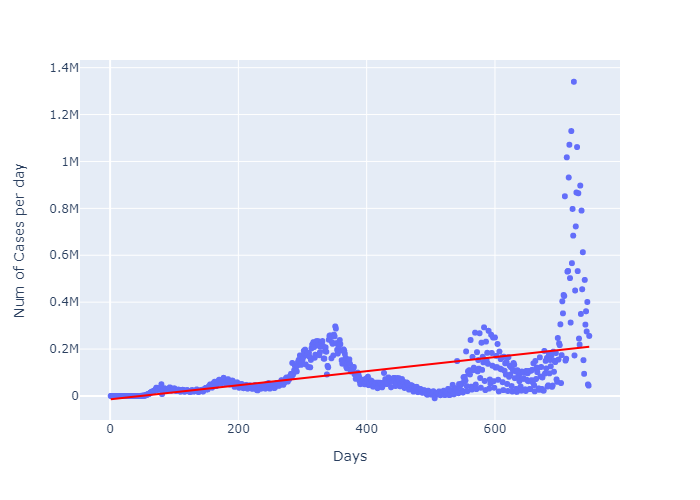

In [62]:
#original 747 columns
df = new_df

fig = px.scatter(new_df, x="Days", y="Num of Cases per day", trendline="ols",trendline_color_override="red")
#fig.show()
fig.write_image("1.png")
Image(filename="1.png")

#### Creating trendline for daily cases based on the added seven days data

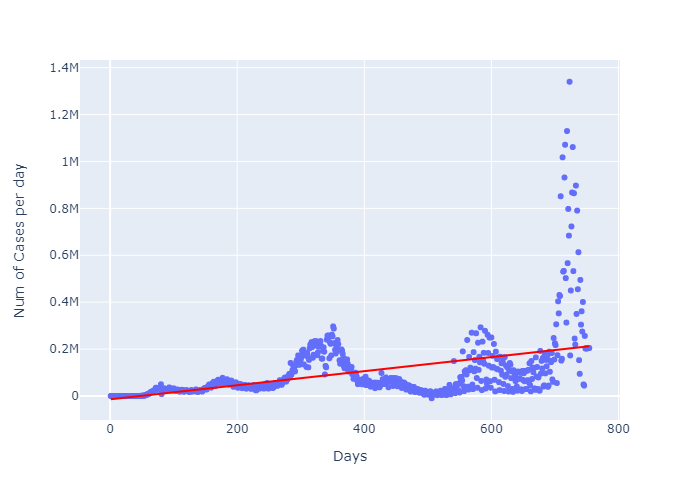

In [63]:
#UPdated forecast for 7 days
fig = px.scatter(df1, x="Days", y="Num of Cases per day", trendline="ols",trendline_color_override="red")
#fig.show()
fig.write_image("2.png")
Image(filename="2.png")

## Inferences:

* From the above graphs where  we try to compare with the original dataset, the new datapoints generated lie in range beyond 747   where 747 is the last data point in the original dataset. 
* After modelling and predicting the new values we see the there was a rise in datapoints from 747 to 754. This range of days on   the X-axis prove that the values have been predicted for a week data based on the model trained on the original dataset.
  The no. of cases on 754th day is 212.6448K.


#### Creating trendline for daily deaths based on the available data

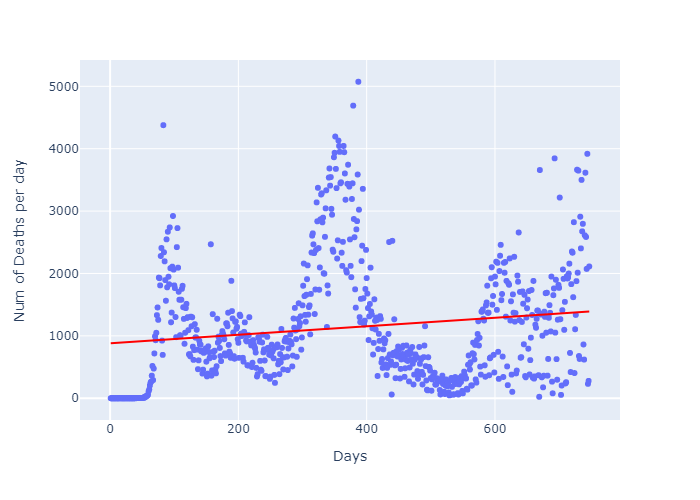

In [64]:
#Orignal Death Trend line
df = new_df

fig = px.scatter(new_df, x="Days", y="Num of Deaths per day", trendline="ols",trendline_color_override="red")
#fig.show()

fig.write_image("3.png")
Image(filename="3.png")

#### Creating trendline for daily deaths based on added seven days data

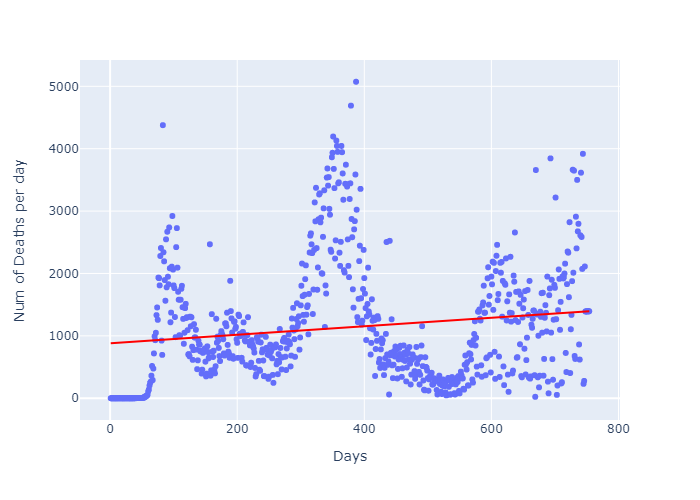

In [65]:
#Updated forecast for 7 days
fig = px.scatter(df1, x="Days", y="Num of Deaths per day", trendline="ols",trendline_color_override="red")
#fig.show()

fig.write_image("4.png")
Image(filename="4.png")

 ## Inferences:

* From the above graphs where  we try to compare with the original dataset, the new datapoints generated lie in range beyond 747   where 747 is the last data point in the original dataset. 
* After modelling and predicting the new values we see the there was a rise in datapoints from 747 to 754. This range of days on   the X-axis prove that the values have been predicted for a week data based on the model trained on the original dataset. The     no. of cases on 754th day is 1406.975